In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [8]:
data=pd.read_csv("sales_data.csv")
data.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


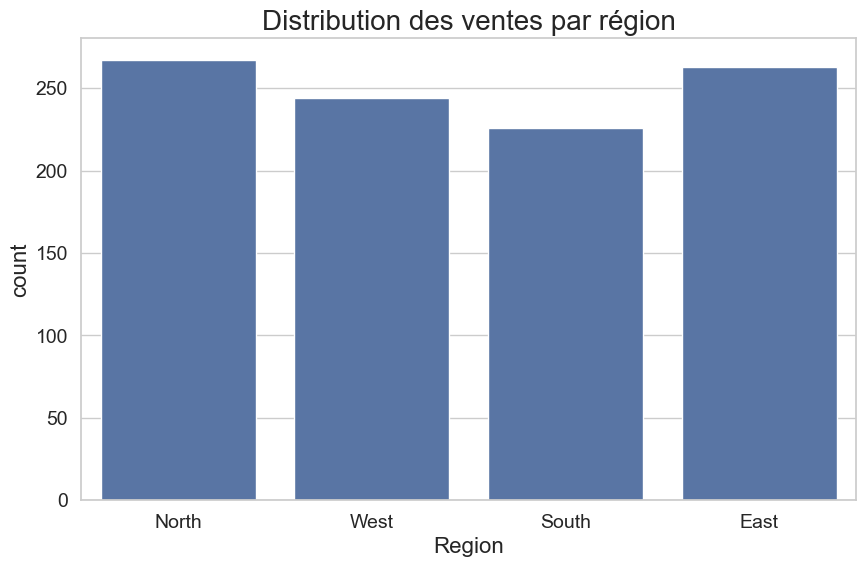

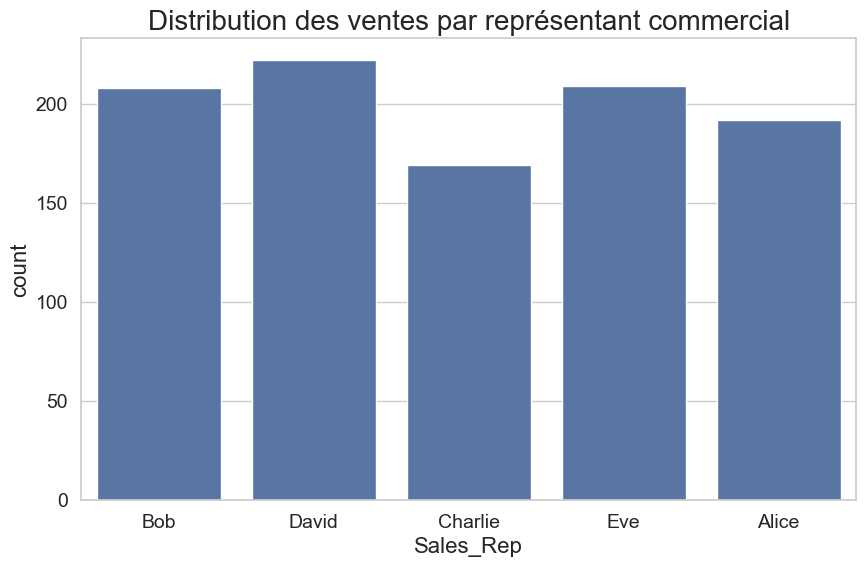

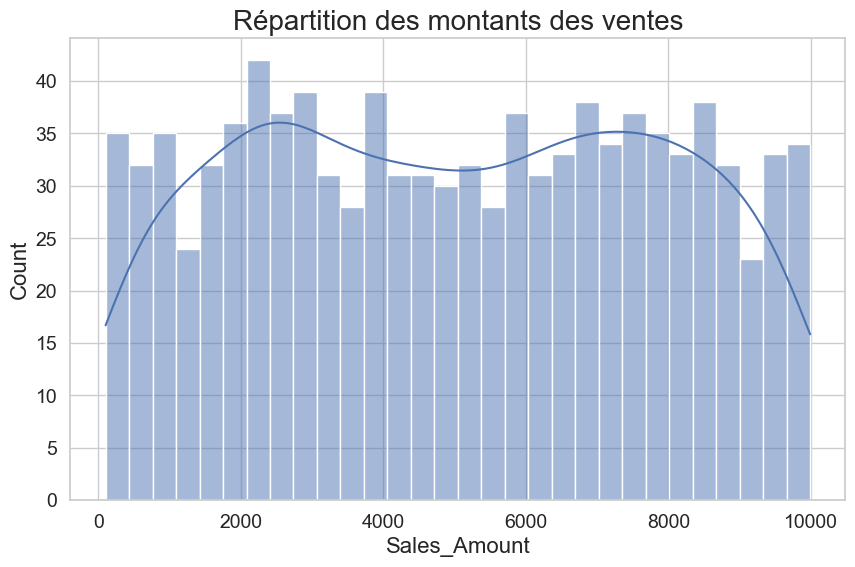

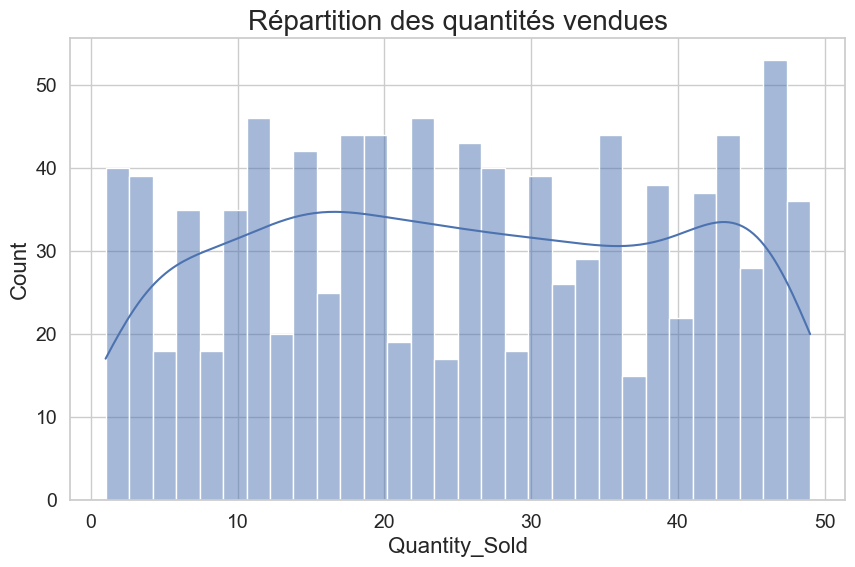

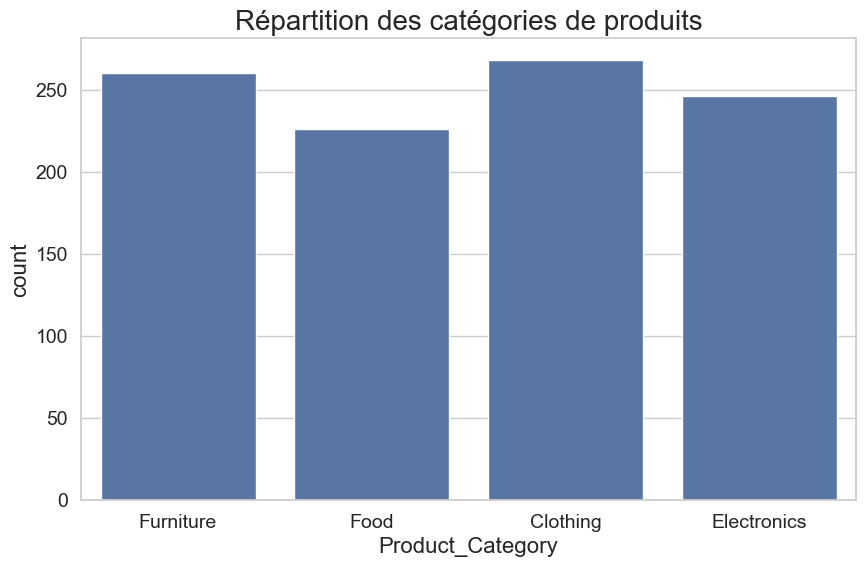

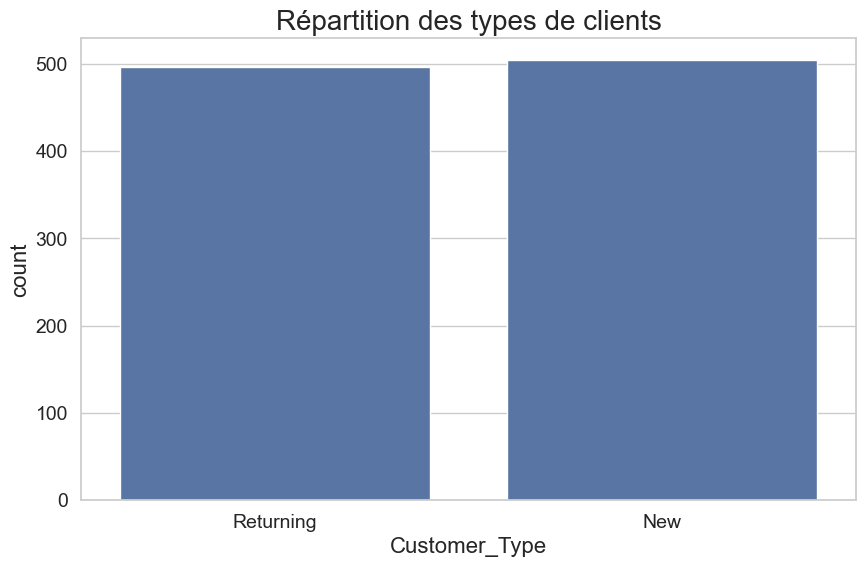

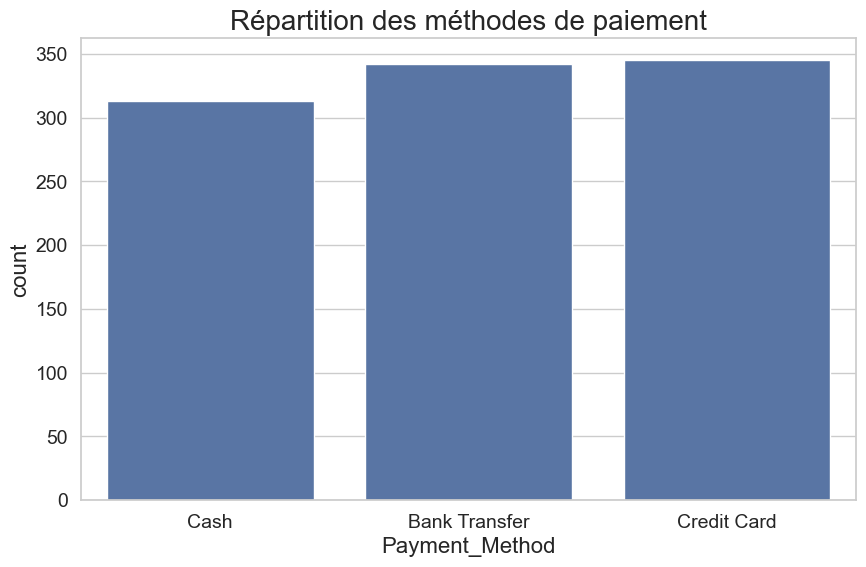

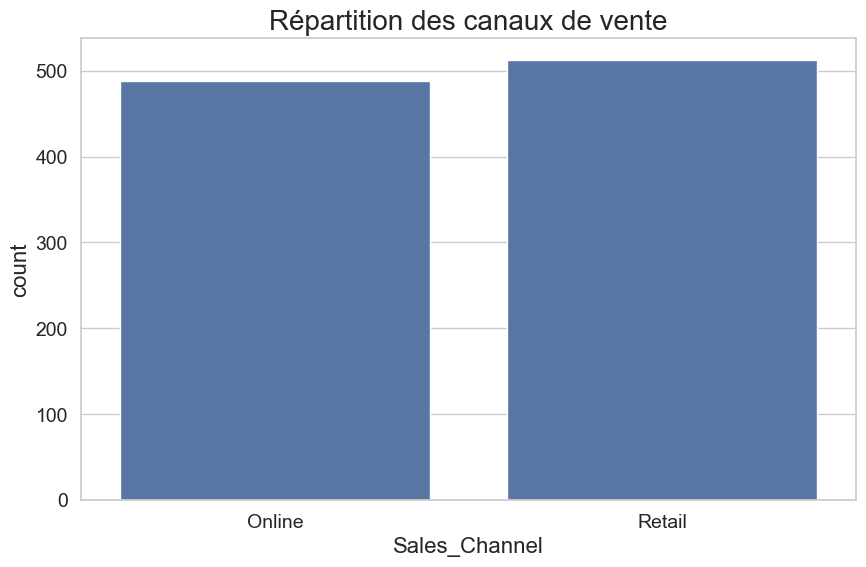

In [9]:
# Distribution des ventes par région
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Region')
plt.title('Distribution des ventes par région')
plt.show()

# Distribution des ventes par représentant commercial
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Sales_Rep')
plt.title('Distribution des ventes par représentant commercial')
plt.show()

# Répartition des montants des ventes
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Sales_Amount', bins=30, kde=True)
plt.title('Répartition des montants des ventes')
plt.show()

# Répartition des quantités vendues
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Quantity_Sold', bins=30, kde=True)
plt.title('Répartition des quantités vendues')
plt.show()

# Répartition des catégories de produits
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Product_Category')
plt.title('Répartition des catégories de produits')
plt.show()

# Répartition des types de clients
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Customer_Type')
plt.title('Répartition des types de clients')
plt.show()

# Répartition des méthodes de paiement
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Payment_Method')
plt.title('Répartition des méthodes de paiement')
plt.show()

# Répartition des canaux de vente
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Sales_Channel')
plt.title('Répartition des canaux de vente')
plt.show()

In [13]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

import plotly.express as px

# Initialiser l'application Dash
app = dash.Dash(__name__)

# Créer des graphiques avec Plotly Express
fig_sales_by_region = px.bar(data, x='Region', y='Sales_Amount', title='Ventes par région')
fig_sales_by_rep = px.bar(data, x='Sales_Rep', y='Sales_Amount', title='Ventes par représentant commercial')
fig_product_category = px.bar(data, x='Product_Category', y='Sales_Amount', title='Répartition des catégories de produits')
fig_customer_type = px.bar(data, x='Customer_Type', y='Sales_Amount', title='Répartition des types de clients')
fig_payment_method = px.bar(data, x='Payment_Method', y='Sales_Amount', title='Répartition des méthodes de paiement')
fig_sales_channel = px.bar(data, x='Sales_Channel', y='Sales_Amount', title='Répartition des canaux de vente')

# Définir la disposition de l'application
app.layout = html.Div(children=[
    html.H1(children='Tableau de bord des ventes'),

    dcc.Graph(
        id='sales-by-region',
        figure=fig_sales_by_region
    ),

    dcc.Graph(
        id='sales-by-rep',
        figure=fig_sales_by_rep
    ),

    dcc.Graph(
        id='product-category',
        figure=fig_product_category
    ),

    dcc.Graph(
        id='customer-type',
        figure=fig_customer_type
    ),

    dcc.Graph(
        id='payment-method',
        figure=fig_payment_method
    ),

    dcc.Graph(
        id='sales-channel',
        figure=fig_sales_channel
    ),
])

# Exécuter l'application
if __name__ == '__main__':
    app.run_server(debug=True)